In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split 
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

matplotlib.rcParams['axes.unicode_minus']=False

(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=500)

print(train_data.shape, test_data.shape)
print(train_data[0])
print(len(train_data[0]))
print(train_label)
print(np.unique(train_label))

(25000,) (25000,)
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218
[1 0 0 ... 0 1 0]
[0 1]


In [22]:
sub_data, val_data, sub_label, val_label = train_test_split(train_data, train_label, random_state=42)
train_seq = pad_sequences(sub_data, maxlen=100)
test_seq = pad_sequences(val_data, maxlen=100)

In [23]:
print(len(sub_data[0]))
print(len(sub_data[5]))
print(len(sub_data[100]))
print(len(train_seq[0]))
print(len(train_seq[5]))
print(len(train_seq[100]))
print((train_seq[1]))


568
1015
640
100
100
100
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
  13 115 219  14  20 366  13   2   4   2 236 291  13  16   2   5   2  12
  47  32   4   2   7  51  13 119   8  67  11   6   2   2  65  11   6 274
  42  23   4 268 225   2   2   2   5   6  52  65  10  10 225 142   2   5
   2 149   6   2   2   7   4   2   2   7   4   2   5   2  10  10  13 104
  45   6 215  67   5  24  64  18   2   2]


In [24]:
train_oh = keras.utils.to_categorical(train_seq)
test_oh = keras.utils.to_categorical(test_seq)
print(train_oh[0][0][:12])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
print(np.sum(train_oh[0][0]))

1.0


In [27]:


# 4. 딥러닝 선언 
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()
# 5. 딥러닝 훈련 
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
293/293 [==============================] - 5s 15ms/step - loss: 0.6930 - accuracy: 0.5167 - val_loss: 0.6901 - val_accuracy: 0.5384
Epoch 2/100
293/293 [==============================] - 4s 15ms/step - loss: 0.6830 - accuracy: 0.5619 - val_loss: 0.6861 - val_accuracy: 0.5477
Epoch 3/100
293/293 [==============================] - 4s 15ms/step - loss: 0.6709 - accuracy: 0.5933 - val_loss: 0.6827 - val_accuracy: 0.5501
Epoch 4/100
293/293 [==============================] - 4s 15ms/step - loss: 0.6564 - accuracy: 0.6135 - val_loss: 0.6803 - val_accuracy: 0.5557
Epoch 5/100
293/293 [==============================] - 4s 15ms/step - loss: 0.6400 - accuracy: 0.6334 - val_loss: 0.6803 - val_accuracy: 0.5614
Epoch 6/100
293/293 [==============================] - 4s 15ms/step - loss: 0.6221 - accuracy: 0.6542 - val_loss: 0.6855 - val_accuracy: 0.5707
Epoch 7/100
293/293 [==============================] - 4s 15ms/step - loss: 0.6064 - accuracy: 0.6731 - val_loss: 0.6983 - val_accuracy:

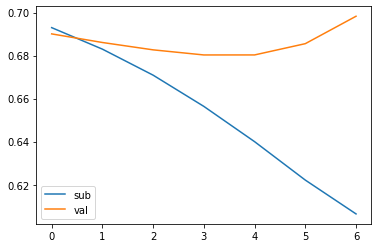

In [28]:

# 콜백 
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb =  keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


# history = model.fit(train_data,train_label, epochs=20)
history = model.fit(train_oh,sub_label, epochs=100, batch_size=64,validation_data=(test_oh, val_label), callbacks=[checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch)



score = model.evaluate(test_oh, val_label)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['sub','val'])
plt.show()



In [29]:
score

[0.6802907586097717, 0.555679976940155]